# 2021a_BFNQG
This notebook, associated to the configuration file *config_2021a_BFNQG.py* runs a BFN-QG experiment to map SSH from real nadir data

# 2021a_BFNQG
This notebook, associated to the configuration file *config_2021a_BFNQG.py* runs a BFN-QG experiment to map SSH from real nadir data

## Configuration file

In [1]:
path_config = 'config_2021a_BFNQG'

In [2]:
import sys
sys.path.append('../..')

In [3]:
from src import exp
config = exp.Exp(path_config)

name_experiment: 2021a_BFNQG
saveoutputs: True
name_exp_save: 2021a_BFNQG
path_save: outputs/2021a_BFNQG
tmp_DA_path: scratch/2021a_BFNQG
init_date: 2016-12-01 00:00:00
final_date: 2018-01-31 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 3:00:00
flag_plot: 0
write_obs: True
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False
path_obs: None

NAME_OBSOP is not set in the configuration file
NAME_BASIS is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)


super: GRID_GEO
lon_min: 295.25
lon_max: 304.75
lat_min: 33.25
lat_max: 42.75
dlon: 0.1
dlat: 0.1
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Observations

In [ ]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

## Model

In [ ]:
from src import mod as mod
Model = mod.Model(config,State)

## Boundary conditions

In [ ]:
from src import bc as bc
Bc = bc.Bc(config)

## Inversion

In [ ]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Bc=Bc)

## Diagnostics

In [5]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSE
dir_output: None
time_min: 2017-01-01 00:00:00
time_max: 2017-12-31 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
bin_lon_step: 1
bin_lat_step: 1
bin_time_step: 1D
name_ref: data/dt_gulfstream_c2_phy_l3_20161201-20180131_285-315_23-53.nc
name_ref_time: time
name_ref_lon: longitude
name_ref_lat: latitude
name_ref_var: sla_unfiltered
options_ref: {}
add_mdt_to_ref: True
path_mdt: ../../aux/aux_mdt_cnes_cls18_global.nc
name_var_mdt: {'lon': 'longitude', 'lat': 'latitude', 'mdt': 'mdt'}
delta_t_ref: 0.9434
velocity_ref: 6.77
lenght_scale: 1000
nb_min_obs: 10
name_exp_var: ssh
compare_to_baseline: True
name_bas: data/OSE_ssh_mapping_DUACS.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: ssh



In [6]:
Diag.regrid_exp()

/home/fleguillou/Dev/MASSH/mapping/examples/2021a_SSH_mapping_OSE/../../src/diag.py:1180: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


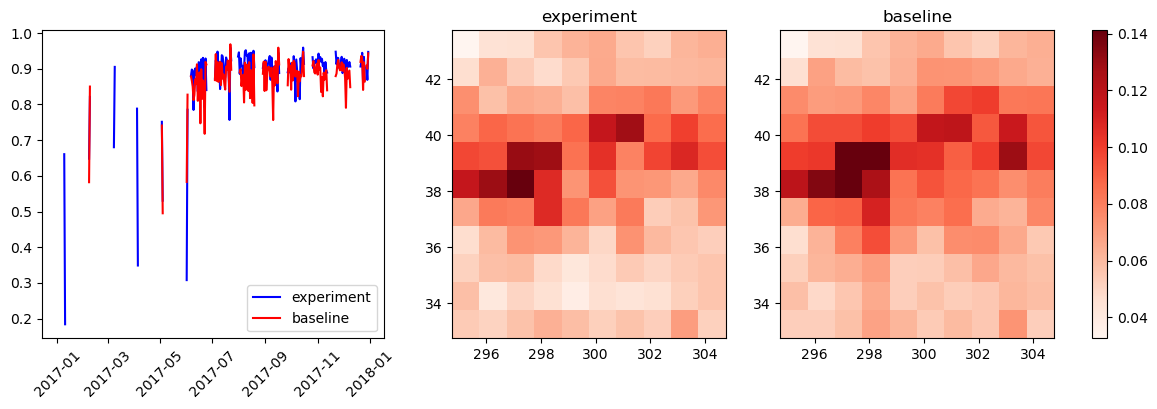

In [7]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/Dev/MASSH/mapping/examples/2021a_SSH_mapping_OSE/../../src/diag.py:1315: RuntimeWarning: divide by zero encountered in divide
  y = 1./wavenumber


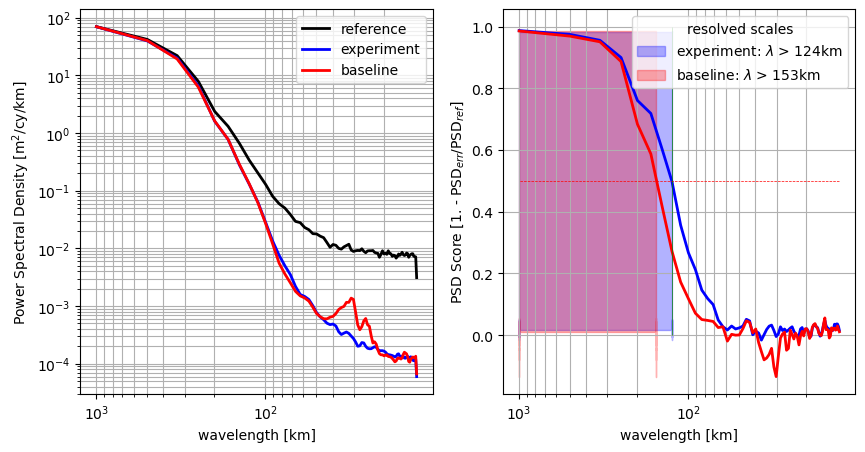

<Figure size 640x480 with 0 Axes>

In [8]:
Diag.psd_based_scores(plot=True)

In [9]:
Diag.Leaderboard()

,Method,µ(RMSE),σ(RMSE),λx (km)
0,2021a_BFNQG,0.88,0.09,124.94
1,baseline,0.87,0.06,153.94
